# THE SPARK FOUNDATION #GRIPOCTOBER2023

# Prediction using Supervised Machine Learning (TAKS-1)

# Author = Ravi Pandey

###### Task :- to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
  

*# Importing Libraries : Sikit Learn, Numpy Array, Pandas, Matplotlib,seaborn*


In [6]:
# Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

##### Step 1 - Reading the data from source

In [3]:
# Reading data from remote link

url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data import successful")


Data import successful


In [5]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [29]:
s_data.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### Step 2 - Input data Visualization

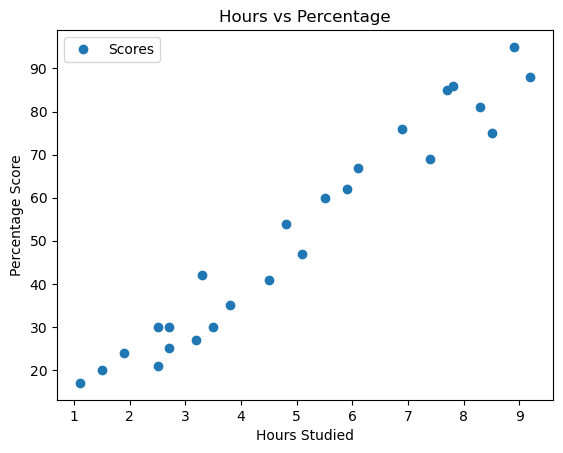

In [ ]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

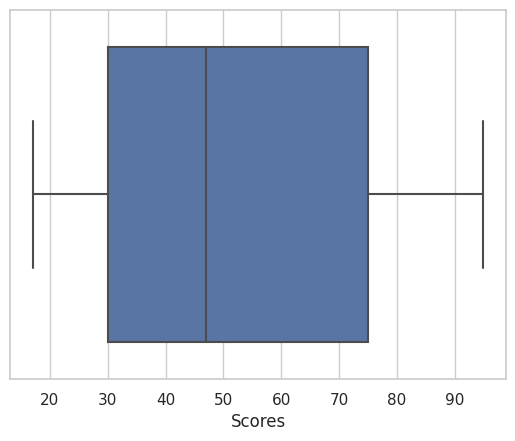

In [7]:
sns.set(style="whitegrid")
tb = sns.boxplot(x=s_data["Scores"])

In [21]:
x = s_data.drop("Scores", axis = "columns")
y = s_data.drop("Hours", axis = "columns")

print("Shape of x", x.shape)
print("Shape of y", y.shape)

Shape of x (25, 1)
Shape of y (25, 1)


##### Step 3 - Data Cleaning & prosessing


###### This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [9]:
s_data.isnull().values.any()

False

In [10]:
s_data.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [12]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

##### Step 4 - Model Training

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), y_train)

print("Training complete.")

Training complete.


##### Step 5 - Plotting the Line of regression

###### Now since our model is trained now, its the time to visualize the best-fit line of regression.

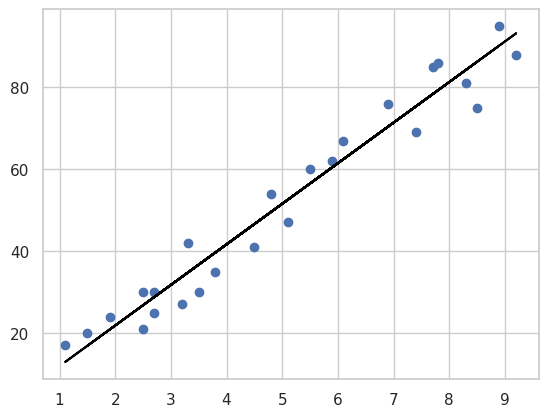

In [28]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='black');
plt.show()

##### Step 6 - Making Predictions

###### Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [15]:
# Testing data
print(X_test)
# Model Prediction
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


##### Step 7 - Comparing Actual result to the Predicted Model result

In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


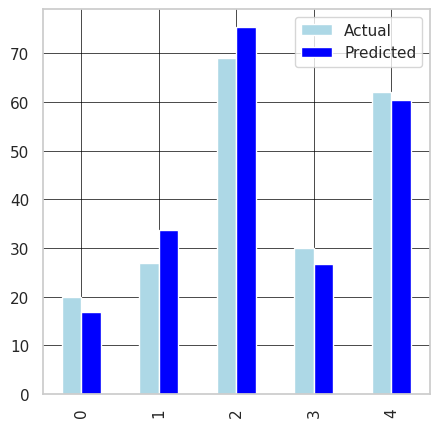

In [27]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
color = ['lightblue', 'blue', 'purple', 'red', 'black']
df.plot(kind='bar',figsize=(5,5), color = color)
plt.grid(which='major', linewidth='0.5', color='black')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

### Q- What will be the predicted score if a student studies for 9.25 hrs/day?

In [19]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


##### Step 8 - Evaluating the model

In [20]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354
